In [44]:
import pandas as pd
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import itertools

In [7]:
bed_1_flat = pd.read_csv('../data/raw/Rental_Price_historical/1_bed_flat.csv')
bed_1_flat.rename(columns = {'Unnamed: 1': 'suburb'}, inplace = True)
bed_1_flat

,Unnamed: 0,suburb,Mar-00,Unnamed: 3,Jun-00,Unnamed: 5,Sep-00,Unnamed: 7,Dec-00,Unnamed: 9,...,Mar-20,Unnamed: 163,Jun-20,Unnamed: 165,Sep-20,Unnamed: 167,Dec-20,Unnamed: 169,Mar-21,Unnamed: 171
0,NaN,NaN,Count,Median,Count,Median,Count,Median,Count,Median,...,Count,Median,Count,Median,Count,Median,Count,Median,Count,Median
1,Inner Melbourne,Albert Park-Middle Park-West St Kilda,352,$165,346,$165,376,$170,367,$175,...,230,$370,228,$355,231,$350,243,$350,263,$340
2,NaN,Armadale,210,$150,210,$150,211,$155,211,$160,...,205,$375,208,$368,170,$350,184,$350,206,$350
3,NaN,Carlton North,86,$150,77,$155,74,$150,65,$150,...,70,$363,67,$360,72,$350,64,$350,68,$338
4,NaN,Carlton-Parkville,297,$170,297,$170,310,$175,343,$180,...,"3,354",$360,"3,239",$356,"2,919",$350,"2,829",$340,"2,097",$300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,NaN,Wanagaratta,51,$85,45,$85,43,$85,46,$85,...,69,$195,67,$195,61,$190,56,$195,52,$195
156,NaN,Warragul,13,$80,11,$75,12,$90,10,$90,...,-,-,-,-,-,-,-,-,-,-
157,NaN,Warrnambool,113,$75,103,$75,107,$75,103,$80,...,61,$200,65,$220,63,$220,63,$230,55,$250
158,NaN,Wodonga,76,$85,72,$85,77,$85,83,$85,...,46,$180,57,$185,56,$185,56,$185,59,$200


In [26]:
agg_by_sub = pd.read_csv('../data/curated/2022_aggregated/agg_bed_avgPrice_sub.csv')
agg_by_sub

,Unnamed: 0,beds,avg_price,count,propertyType,suburb,median
0,0,1,500.0,1,Acreage / Semi-Rural,Oaklands Junction,500.0
1,1,1,401.0,15,Apartment / Unit / Flat,Abbotsford,410.0
2,2,1,290.0,1,Apartment / Unit / Flat,Airport West,290.0
3,3,1,417.5,2,Apartment / Unit / Flat,Albert Park,417.5
4,4,1,320.0,2,Apartment / Unit / Flat,Alphington,320.0
...,...,...,...,...,...,...,...
2930,2930,7,1250.0,1,House,Brunswick,1250.0
2931,2931,7,170.0,1,House,Dandenong,170.0
2932,2932,8,1950.0,1,House,Balaclava,1950.0
2933,2933,8,1300.0,1,House,Mordialloc,1300.0


In [27]:
agg_flat = agg_by_sub[agg_by_sub['propertyType'] == 'Apartment / Unit / Flat']
agg_flat

,Unnamed: 0,beds,avg_price,count,propertyType,suburb,median
1,1,1,401.0,15,Apartment / Unit / Flat,Abbotsford,410.0
2,2,1,290.0,1,Apartment / Unit / Flat,Airport West,290.0
3,3,1,417.5,2,Apartment / Unit / Flat,Albert Park,417.5
4,4,1,320.0,2,Apartment / Unit / Flat,Alphington,320.0
5,5,1,390.0,2,Apartment / Unit / Flat,Altona,390.0
...,...,...,...,...,...,...,...
2193,2193,4,1975.0,1,Apartment / Unit / Flat,St Kilda,1975.0
2194,2194,4,490.0,1,Apartment / Unit / Flat,Wantirna South,490.0
2753,2753,5,595.0,1,Apartment / Unit / Flat,Clayton,595.0
2754,2754,5,750.0,1,Apartment / Unit / Flat,Montmorency,750.0


#### Checking to see how many matching suburb we have for scraped data from domain and historical data

In [28]:
query = 'SELECT * FROM bed_1_flat INNER JOIN agg_flat on bed_1_flat.suburb = agg_flat.suburb AND agg_flat.beds = 1'
joined = pysqldf(query)

In [29]:
joined

,Unnamed: 0,suburb,Mar-00,Unnamed: 3,Jun-00,Unnamed: 5,Sep-00,Unnamed: 7,Dec-00,Unnamed: 9,...,Unnamed: 169,Mar-21,Unnamed: 171,Unnamed: 0,beds,avg_price,count,propertyType,suburb,median
0,Outer Western Melbourne,Altona,87,$95,93,$100,96,$105,97,$105,...,$290,86,$280,5,1,390.000000,2,Apartment / Unit / Flat,Altona,390.0
1,None,Armadale,210,$150,210,$150,211,$155,211,$160,...,$350,206,$350,6,1,447.500000,4,Apartment / Unit / Flat,Armadale,455.0
2,Inner Eastern Melbourne,Balwyn,12,$145,12,$150,16,$150,17,$140,...,$360,71,$350,10,1,470.000000,1,Apartment / Unit / Flat,Balwyn,470.0
3,Bendigo,Bendigo,84,$85,79,$85,85,$90,84,$90,...,$235,35,$230,13,1,250.000000,3,Apartment / Unit / Flat,Bendigo,280.0
4,None,Bentleigh,154,$125,163,$128,151,$130,146,$130,...,$320,201,$300,14,1,377.500000,2,Apartment / Unit / Flat,Bentleigh,377.5
5,None,Blackburn,53,$120,49,$125,53,$125,57,$130,...,$350,142,$344,16,1,358.750000,4,Apartment / Unit / Flat,Blackburn,360.0
6,None,Boronia,13,$100,11,$115,16,$115,18,$115,...,$328,36,$330,18,1,250.000000,1,Apartment / Unit / Flat,Boronia,250.0
7,None,Box Hill,74,$126,85,$130,87,$135,92,$135,...,$295,559,$320,19,1,295.000000,14,Apartment / Unit / Flat,Box Hill,260.0
8,None,Brighton,29,$185,36,$163,43,$160,40,$163,...,$400,65,$390,22,1,407.500000,4,Apartment / Unit / Flat,Brighton,415.0
9,None,Brunswick,407,$120,462,$120,479,$120,477,$120,...,$350,489,$340,25,1,383.611111,18,Apartment / Unit / Flat,Brunswick,380.0


In [13]:
df_1bed_flat = pd.read_csv('../data/curated/Rental_Price_historical/joined_1_bed_flat_monetary.csv')

In [22]:
df_1bed_flat.drop(df_1bed_flat.columns[1:89], axis=1, inplace = True)
df_1bed_flat.to_csv('../data/curated/Rental_Price_historical/joined_1_bed_flat_monetary_2011-2021.csv')

In [17]:
df_1bed_flat.columns.get_loc("Median_Mar2011")

90

In [15]:
CORR_COLS = ['Median_Mar2', 'Median_age_persons_2011', 'Median_mortgage_repay_monthly_2011', 'Median_tot_prsnl_inc_weekly_2011', 
             'Median_rent_weekly_2011', 'Median_tot_fam_inc_weekly_2011','Average_num_psns_per_bedroom_2011', 
             'Average_household_size_2011']

In [66]:
CORR_COLS2 = ['Median_Mar', 'Median_age_persons', 'Median_mortgage_repay_monthly', 'Median_tot_prsnl_inc_weekly', 
             'Median_rent_weekly', 'Median_tot_fam_inc_weekly','Average_num_psns_per_bedroom', 
             'Average_household_size']

yrs = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

In [16]:
df_1bed_flat['Median_Mar2000'][6]

'-'

In [28]:
for col in df_1bed_flat:
    df_1bed_flat[col] = df_1bed_flat[col].replace("-","-1")
    if "Median" in col:
        df_1bed_flat[col] = df_1bed_flat[col].replace("$","")
        df_1bed_flat[col] = pd.to_numeric(df_1bed_flat[col])

In [29]:
df_1bed_flat

,Suburb,Count_Mar2011,Median_Mar2011,Count_Jun2011,Median_Jun2011,Count_Sep2011,Median_Sep2011,Count_Dec2011,Median_Dec2011,Count_Mar2012,...,Average_household_size_2014,Average_household_size_2015,Average_household_size_2016,Average_household_size_2017,Average_household_size_2018,Average_household_size_2019,Average_household_size_2020,Average_household_size_2021,Suburb.1,Postcode.1
0,Albert Park-Middle Park-West St Kilda,298,315,295,320,277,320,292,325,296,...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
1,Armadale,174,293,178,298,180,300,179,300,178,...,2.640000,2.570000,2.8,2.430000,2.360000,2.290000,2.220000,2.0,Lilydale,3143
2,Carlton North,60,293,52,298,51,300,47,305,47,...,1.360000,1.330000,0.0,1.270000,1.240000,1.210000,1.180000,1.8,"Hotham Hill, North Melbourne",3053
3,Carlton-Parkville,"1,963",311,"1,981",311,"2,058",311,"2,113",313,"2,312",...,2.706667,2.636667,2.8,2.496667,2.426667,2.356667,2.286667,2.1,"Attwood, Westmeadows",3052
4,CBD-St Kilda Rd,"3,099",370,"3,083",370,"3,033",375,"3,075",380,"3,184",...,2.773333,2.653333,3.0,2.413333,2.293333,2.173333,2.053333,1.7,Scoresby,3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Torquay,19,220,17,220,17,220,17,220,19,...,2.560000,2.580000,2.6,2.620000,2.640000,2.660000,2.680000,2.7,Ocean Grove,3228
140,Traralgon,79,130,77,130,80,133,74,135,72,...,2.233333,2.233333,1.9,2.233333,2.233333,2.233333,2.233333,2.4,Nicholson,3844
141,Warragul,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,2.546667,2.556667,2.8,2.576667,2.586667,2.596667,2.606667,2.5,"Valencia Creek, Briagolong, Coongulla, Maffra,...",3820
142,Warrnambool,71,150,73,150,78,158,77,150,76,...,2.773333,2.703333,2.6,2.563333,2.493333,2.423333,2.353333,2.3,"Bushfield, Grassmere, Winslow, Woodford",3280


<AxesSubplot:>

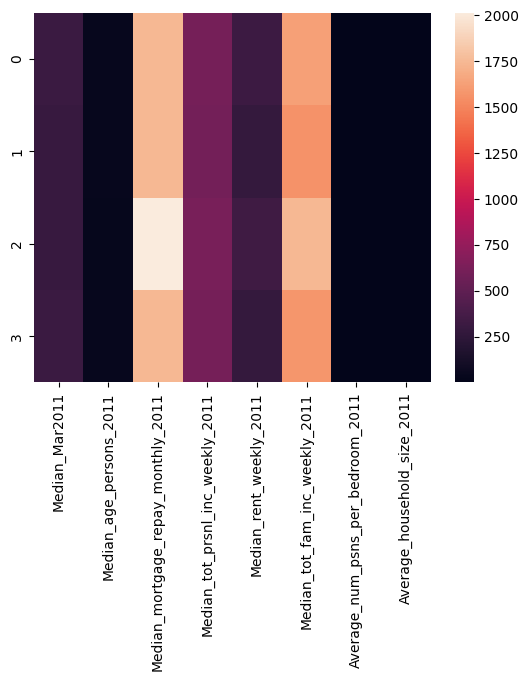

In [34]:
sns.heatmap()

In [36]:
df_1bed_flat.loc[0,:]

Suburb                         Albert Park-Middle Park-West St Kilda
Count_Mar2011                                                    298
Median_Mar2011                                                   315
Count_Jun2011                                                    295
Median_Jun2011                                                   320
                                               ...                  
Average_household_size_2019                                 2.173333
Average_household_size_2020                                 2.053333
Average_household_size_2021                                      1.7
Suburb.1                                                    Scoresby
Postcode.1                                                      3182
Name: 0, Length: 163, dtype: object

In [56]:
new = [CORR_COLS2, yrs]
combination = [p for p in itertools.product(*new)]
combination
all_corr_columns = []
for e in combination:
    if ('Mar' in e[0]):
        all_corr_columns.append(str(e[0])+str(e[1]))
    else:
        all_corr_columns.append(str(e[0])+'_'+str(e[1]))
    
all_corr_columns

['Median_Mar2012',
 'Median_Mar2013',
 'Median_Mar2014',
 'Median_Mar2015',
 'Median_Mar2017',
 'Median_Mar2018',
 'Median_Mar2019',
 'Median_Mar2020',
 'Median_age_persons_2012',
 'Median_age_persons_2013',
 'Median_age_persons_2014',
 'Median_age_persons_2015',
 'Median_age_persons_2017',
 'Median_age_persons_2018',
 'Median_age_persons_2019',
 'Median_age_persons_2020',
 'Median_mortgage_repay_monthly_2012',
 'Median_mortgage_repay_monthly_2013',
 'Median_mortgage_repay_monthly_2014',
 'Median_mortgage_repay_monthly_2015',
 'Median_mortgage_repay_monthly_2017',
 'Median_mortgage_repay_monthly_2018',
 'Median_mortgage_repay_monthly_2019',
 'Median_mortgage_repay_monthly_2020',
 'Median_tot_prsnl_inc_weekly_2012',
 'Median_tot_prsnl_inc_weekly_2013',
 'Median_tot_prsnl_inc_weekly_2014',
 'Median_tot_prsnl_inc_weekly_2015',
 'Median_tot_prsnl_inc_weekly_2017',
 'Median_tot_prsnl_inc_weekly_2018',
 'Median_tot_prsnl_inc_weekly_2019',
 'Median_tot_prsnl_inc_weekly_2020',
 'Median_rent_we

In [68]:
test = df_1bed_flat.iloc[0,:]
X_df = {}
for feature in CORR_COLS2:
    f = []
    for t in test.iteritems():
        if feature in t[0]:
            f.append(t[1])
    X_df[feature] = f

X_df = pd.DataFrame.from_dict(X_df)
X_df.loc[:,'year'] = yrs

In [69]:
X_df

,Median_Mar,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Average_household_size,year
0,315,36.0,1745.656006,600.352556,320.322337,1628.808864,1.100000,2.900000,2011
1,328,36.6,1718.707983,585.844443,334.679861,1661.613557,1.006667,3.013333,2012
2,330,36.7,1711.611505,628.384025,334.550495,1732.435832,0.996667,2.893333,2013
3,320,36.8,1704.515028,670.923608,334.421129,1803.258106,0.986667,2.773333,2014
4,320,36.9,1697.418550,713.463190,334.291763,1874.080381,0.976667,2.653333,2015
5,325,38.0,1650.618982,641.907382,363.136176,1868.867492,0.800000,3.000000,2016
6,340,37.1,1683.225595,798.542354,334.033032,2015.724930,0.956667,2.413333,2017
7,350,37.2,1676.129117,841.081936,333.903666,2086.547204,0.946667,2.293333,2018
8,350,37.3,1669.032639,883.621518,333.774300,2157.369479,0.936667,2.173333,2019
9,370,37.4,1661.936161,926.161101,333.644934,2228.191754,0.926667,2.053333,2020


<AxesSubplot:>

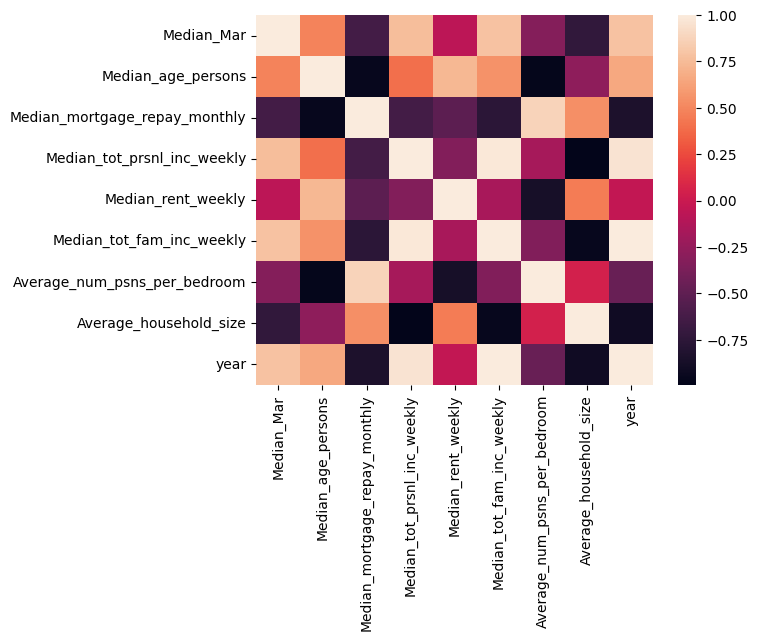

In [71]:
sns.heatmap(X_df.corr())

In [46]:
all_combinations = [list(zip(each_permutation, yrs)) for each_permutation in itertools.permutations(CORR_COLS2, 2)]
all_combinations

[[('Median_Mar', 2012), ('Median_age_persons', 2013)],
 [('Median_Mar', 2012), ('Median_mortgage_repay_monthly', 2013)],
 [('Median_Mar', 2012), ('Median_tot_prsnl_inc_weekly', 2013)],
 [('Median_Mar', 2012), ('Median_rent_weekly', 2013)],
 [('Median_Mar', 2012), ('Median_tot_fam_inc_weekly', 2013)],
 [('Median_Mar', 2012), ('Average_num_psns_per_bedroom', 2013)],
 [('Median_Mar', 2012), ('Average_household_size', 2013)],
 [('Median_age_persons', 2012), ('Median_Mar', 2013)],
 [('Median_age_persons', 2012), ('Median_mortgage_repay_monthly', 2013)],
 [('Median_age_persons', 2012), ('Median_tot_prsnl_inc_weekly', 2013)],
 [('Median_age_persons', 2012), ('Median_rent_weekly', 2013)],
 [('Median_age_persons', 2012), ('Median_tot_fam_inc_weekly', 2013)],
 [('Median_age_persons', 2012), ('Average_num_psns_per_bedroom', 2013)],
 [('Median_age_persons', 2012), ('Average_household_size', 2013)],
 [('Median_mortgage_repay_monthly', 2012), ('Median_Mar', 2013)],
 [('Median_mortgage_repay_monthly'

[('Median_Mar', 2012),
 ('Median_Mar', 2013),
 ('Median_Mar', 2014),
 ('Median_Mar', 2015),
 ('Median_Mar', 2017),
 ('Median_Mar', 2018),
 ('Median_Mar', 2019),
 ('Median_Mar', 2020),
 ('Median_age_persons', 2012),
 ('Median_age_persons', 2013),
 ('Median_age_persons', 2014),
 ('Median_age_persons', 2015),
 ('Median_age_persons', 2017),
 ('Median_age_persons', 2018),
 ('Median_age_persons', 2019),
 ('Median_age_persons', 2020),
 ('Median_mortgage_repay_monthly', 2012),
 ('Median_mortgage_repay_monthly', 2013),
 ('Median_mortgage_repay_monthly', 2014),
 ('Median_mortgage_repay_monthly', 2015),
 ('Median_mortgage_repay_monthly', 2017),
 ('Median_mortgage_repay_monthly', 2018),
 ('Median_mortgage_repay_monthly', 2019),
 ('Median_mortgage_repay_monthly', 2020),
 ('Median_tot_prsnl_inc_weekly', 2012),
 ('Median_tot_prsnl_inc_weekly', 2013),
 ('Median_tot_prsnl_inc_weekly', 2014),
 ('Median_tot_prsnl_inc_weekly', 2015),
 ('Median_tot_prsnl_inc_weekly', 2017),
 ('Median_tot_prsnl_inc_weekly',